<a href="https://colab.research.google.com/github/martinfinis/HelloCodeSchoolProject/blob/master/Quest_Simple_Image_Classification_with_Neural_Networks_Martin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization,ReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
import matplotlib.pyplot as plt

def history_plot_from_loss_acc(history, title):
  plt.figure(figsize=(10,5))

  train_loss_list = history.history['loss']
  train_accuracy = history.history['accuracy']
  val_loss_list = history.history['val_loss']
  val_accuracy_list = history.history['val_accuracy']
  x = history.epoch
  
  plt.subplot(1,2,1)
  plt.plot(x, train_loss_list)
  plt.plot(x, val_loss_list)
  plt.legend(['train_loss', 'val_loss'])
  plt.title(title+"_ LOSS")
  
  plt.subplot(1,2,2)
  plt.plot(x, train_accuracy)
  plt.plot(x, val_accuracy_list)
  plt.legend(['train_acc','val_accuracy'])
  plt.title(title+"_ ACCURACY")
  plt.show()

#load the data

In [3]:
(X_train, y_train),(X_test, y_test) =  keras.datasets.fashion_mnist.load_data()

# view the data

In [4]:
type(X_train),type(y_train)

(numpy.ndarray, numpy.ndarray)

In [5]:
X_train.shape,y_train.shape,X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
np.unique(y_train[:])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### display Images

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_label = dict(zip(range(10), class_names))

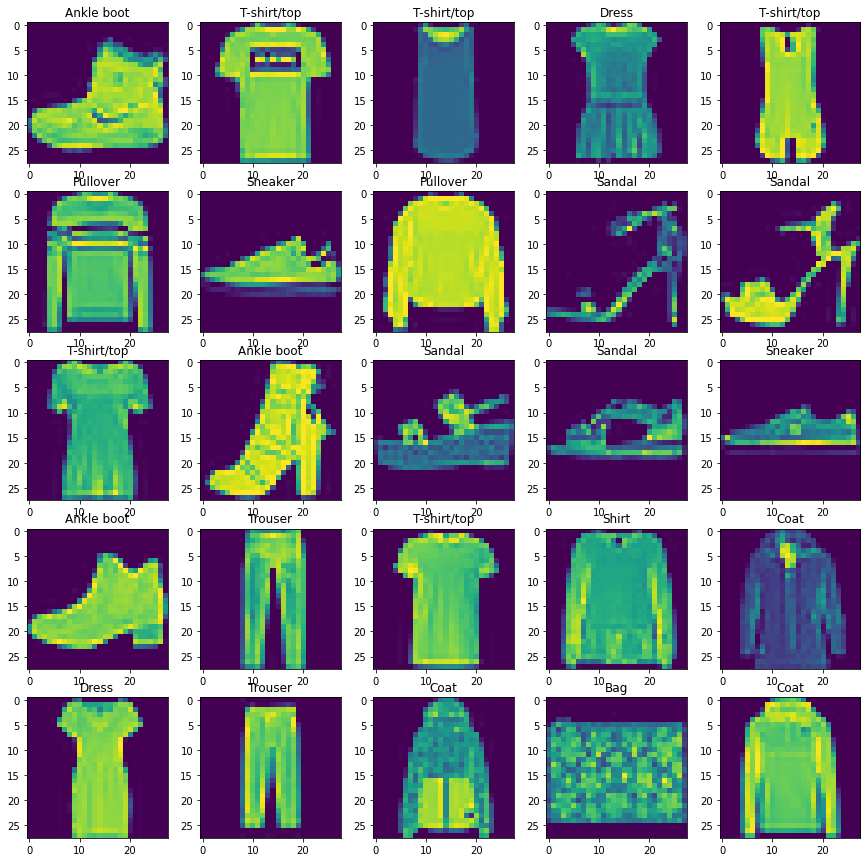

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))

for i in range(25):
  plt.subplot(5,5, i+1)
  plt.imshow(X_train[i])
  plt.title(class_label.get(y_train[i]))
  
plt.show()

# build model

## model without ImageDataGenerator

In [9]:
learning_rate = 0.001
dec_rate = 0 #1/4353 * 0.2 
optim = Adam(lr=learning_rate, decay=dec_rate)

model = Sequential()
model.add(Conv2D(32, (3,3), padding='valid',activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3), padding='valid',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128,(3,3), padding='valid',activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                7

In [10]:
# reshape input
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 49s 33ms/step - loss: 1.2019 - accuracy: 0.7455 - val_loss: 0.3780 - val_accuracy: 0.8609
Epoch 2/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.3491 - accuracy: 0.8752 - val_loss: 0.3481 - val_accuracy: 0.8755
Epoch 3/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.3115 - accuracy: 0.8875 - val_loss: 0.3300 - val_accuracy: 0.8812
Epoch 4/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.2864 - accuracy: 0.8940 - val_loss: 0.3100 - val_accuracy: 0.8886
Epoch 5/10
1500/1500 [==============================] - 52s 34ms/step - loss: 0.2581 - accuracy: 0.9064 - val_loss: 0.3298 - val_accuracy: 0.8821
Epoch 6/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.2405 - accuracy: 0.9109 - val_loss: 0.3025 - val_accuracy: 0.8876
Epoch 7/10
1500/1500 [==============================] - 52s 35ms/step - loss: 0.2273 - accuracy: 0.9168 - val_loss: 0.3010 -

In [13]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.3356 - accuracy: 0.8915


[0.33559462428092957, 0.8914999961853027]

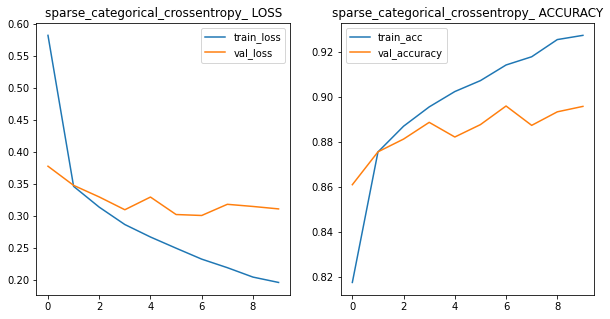

In [17]:
history_plot_from_loss_acc(history, "sparse_categorical_crossentropy")

## model_2 with ImageDataGenerator

In [18]:
datagen = ImageDataGenerator(rescale=1./255.,validation_split=0.2)
datagen_test = ImageDataGenerator(rescale=1./255. )

train_generator = datagen.flow(X_train,y_train,batch_size=32,shuffle=True,seed=42,subset='training')# TODO,color_mode='grayscale'
valid_generator = datagen.flow(X_train,y_train,batch_size=32,shuffle=True,seed=42,subset='validation')
test_generator = datagen_test.flow(X_test,y_test,batch_size=32,seed=42)

In [19]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size
STEP_SIZE_TRAIN,STEP_SIZE_VALID,STEP_SIZE_TEST

(1500, 375, 312)

In [20]:
learning_rate = 0.001
dec_rate = 0 #1/4353 * 0.2 
optim = Adam(lr=learning_rate, decay=dec_rate)

model_2 = Sequential()
model_2.add(Conv2D(32, (3,3), padding='valid',activation='relu', input_shape=(28,28,1)))
model_2.add(MaxPooling2D())
model_2.add(Conv2D(64,(3,3), padding='valid',activation='relu'))
model_2.add(MaxPooling2D())
model_2.add(Conv2D(128,(3,3), padding='valid',activation='relu'))
model_2.add(Flatten())
model_2.add(Dense(64,activation='relu'))
model_2.add(Dense(10,activation='softmax'))
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [21]:
model_2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
history_2 = model_2.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data = valid_generator,
                    validation_steps = STEP_SIZE_TEST,
                    epochs=10)
                    

Epoch 1/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.7309 - accuracy: 0.7339 - val_loss: 0.3739 - val_accuracy: 0.8657
Epoch 2/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.3566 - accuracy: 0.8691 - val_loss: 0.3113 - val_accuracy: 0.8876
Epoch 3/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.2921 - accuracy: 0.8924 - val_loss: 0.2694 - val_accuracy: 0.9014
Epoch 4/10
1500/1500 [==============================] - 50s 34ms/step - loss: 0.2570 - accuracy: 0.9036 - val_loss: 0.2780 - val_accuracy: 0.8922
Epoch 5/10
1500/1500 [==============================] - 50s 34ms/step - loss: 0.2265 - accuracy: 0.9164 - val_loss: 0.2613 - val_accuracy: 0.9040
Epoch 6/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.2042 - accuracy: 0.9263 - val_loss: 0.2636 - val_accuracy: 0.9028
Epoch 7/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.1862 - accuracy: 0.9293 - val_loss: 0.2641 -

In [23]:
model_2.evaluate(test_generator)

313/313 [==============================] - 3s 11ms/step - loss: 0.2900 - accuracy: 0.9075


[0.2900034189224243, 0.9075000286102295]

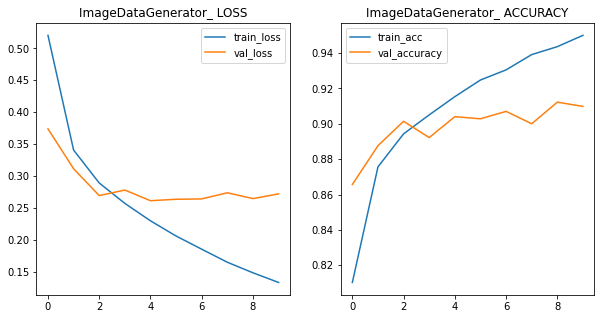

In [24]:
history_plot_from_loss_acc(history_2, "ImageDataGenerator")

# model_3 add BatchNormalization 

In [27]:
learning_rate = 0.001
dec_rate = 0 #1/4353 * 0.2 
optim = Adam(lr=learning_rate, decay=dec_rate)

model_3 = Sequential()
model_3.add(Conv2D(32, (3,3), padding='valid', input_shape=(28,28,1)))
model_3.add(BatchNormalization())
model_3.add(ReLU())
model_3.add(MaxPooling2D())

model_3.add(Conv2D(64,(3,3), padding='valid'))
model_3.add(BatchNormalization())
model_3.add(ReLU())
model_3.add(MaxPooling2D())


model_3.add(Conv2D(128,(3,3), padding='valid'))
model_3.add(BatchNormalization())
model_3.add(ReLU())
model_3.add(Flatten())

model_3.add(Dense(64))
model_3.add(BatchNormalization())
model_3.add(ReLU())

model_3.add(Dense(10,activation='softmax'))
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 11, 11, 64)       

In [28]:
model_3.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
history_3 = model_3.fit(X_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 68s 45ms/step - loss: 0.5561 - accuracy: 0.8083 - val_loss: 0.3275 - val_accuracy: 0.8840
Epoch 2/15
1500/1500 [==============================] - 68s 45ms/step - loss: 0.2945 - accuracy: 0.8929 - val_loss: 0.3103 - val_accuracy: 0.8857
Epoch 3/15
1500/1500 [==============================] - 68s 45ms/step - loss: 0.2413 - accuracy: 0.9117 - val_loss: 0.2719 - val_accuracy: 0.9000
Epoch 4/15
1500/1500 [==============================] - 68s 46ms/step - loss: 0.2068 - accuracy: 0.9235 - val_loss: 0.2575 - val_accuracy: 0.9078
Epoch 5/15
1500/1500 [==============================] - 67s 45ms/step - loss: 0.1813 - accuracy: 0.9317 - val_loss: 0.2509 - val_accuracy: 0.9108
Epoch 6/15
1500/1500 [==============================] - 68s 45ms/step - loss: 0.1596 - accuracy: 0.9404 - val_loss: 0.2510 - val_accuracy: 0.9109
Epoch 7/15
1500/1500 [==============================] - 68s 45ms/step - loss: 0.1395 - accuracy: 0.9489 - val_loss: 0.2778 -

In [30]:
model_3.evaluate(X_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.3609 - accuracy: 0.9031


[0.36089977622032166, 0.9031000137329102]

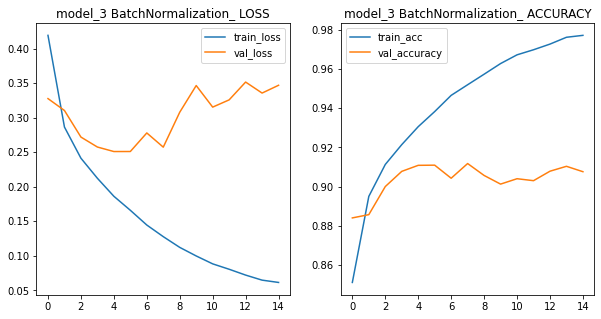

In [31]:
history_plot_from_loss_acc(history_3, "model_3 BatchNormalization")

# model_4 with dropout and Batchnormalization

In [32]:
drop_1 = 0.3 # Dropout rate  
drop_2 = 0.5 # Dropout rate for 1st Dense layer

learning_rate = 0.001
dec_rate = 0 #1/4353 * 0.2 
optim = Adam(lr=learning_rate, decay=dec_rate)

model_4 = Sequential()
model_4.add(Conv2D(32, (3,3), padding='valid', input_shape=(28,28,1)))
model_4.add(BatchNormalization())
model_4.add(ReLU())
model_4.add(MaxPooling2D())
model_4.add(Dropout(drop_1))

model_4.add(Conv2D(64,(3,3), padding='valid'))
model_4.add(BatchNormalization())
model_4.add(ReLU())
model_4.add(MaxPooling2D())
model_4.add(Dropout(drop_1))

model_4.add(Conv2D(128,(3,3), padding='valid'))
model_4.add(BatchNormalization())
model_4.add(ReLU())
model_4.add(Flatten())
model_4.add(Dropout(drop_2))

model_4.add(Dense(64))
model_4.add(BatchNormalization())
model_4.add(ReLU())

model_4.add(Dense(10,activation='softmax'))
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
re_lu_4 (ReLU)               (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 11, 11, 64)       

In [33]:
model_4.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
history_4 = model_4.fit(X_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 73s 48ms/step - loss: 0.8310 - accuracy: 0.7056 - val_loss: 0.3846 - val_accuracy: 0.8621
Epoch 2/15
1500/1500 [==============================] - 71s 47ms/step - loss: 0.4404 - accuracy: 0.8374 - val_loss: 0.3689 - val_accuracy: 0.8557
Epoch 3/15
1500/1500 [==============================] - 71s 47ms/step - loss: 0.3917 - accuracy: 0.8551 - val_loss: 0.3075 - val_accuracy: 0.8820
Epoch 4/15
1500/1500 [==============================] - 71s 47ms/step - loss: 0.3592 - accuracy: 0.8676 - val_loss: 0.3153 - val_accuracy: 0.8801
Epoch 5/15
1500/1500 [==============================] - 70s 47ms/step - loss: 0.3457 - accuracy: 0.8738 - val_loss: 0.3370 - val_accuracy: 0.8700
Epoch 6/15
1500/1500 [==============================] - 70s 47ms/step - loss: 0.3236 - accuracy: 0.8799 - val_loss: 0.2829 - val_accuracy: 0.8954
Epoch 7/15
1500/1500 [==============================] - 70s 47ms/step - loss: 0.3038 - accuracy: 0.8862 - val_loss: 0.3559 -

In [35]:
model_4.evaluate(X_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.3444 - accuracy: 0.8640


[0.34441688656806946, 0.8640000224113464]

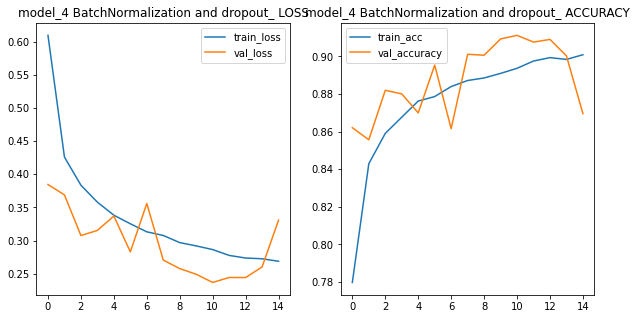

In [36]:
history_plot_from_loss_acc(history_4, "model_4 BatchNormalization and dropout")

## different model architecture, add for each layer one Conv2D and padding same

In [39]:
drop_1 = 0.3 # Dropout rate  
drop_2 = 0.5 # Dropout rate for 1st Dense layer

learning_rate = 0.001
dec_rate = 0 #1/4353 * 0.2 
optim = Adam(lr=learning_rate, decay=dec_rate)

model_5 = Sequential()
model_5.add(Conv2D(32, (3,3), padding='same', input_shape=(28,28,1)))
model_5.add(Conv2D(32, (3,3), padding='same'))
model_5.add(BatchNormalization())
model_5.add(ReLU())
model_5.add(MaxPooling2D())
model_5.add(Dropout(drop_1))

model_5.add(Conv2D(64,(3,3), padding='same'))
model_5.add(Conv2D(64,(3,3), padding='same'))
model_5.add(BatchNormalization())
model_5.add(ReLU())
model_5.add(MaxPooling2D())
model_5.add(Dropout(drop_1))

model_5.add(Conv2D(128,(3,3), padding='same'))
model_5.add(Conv2D(128,(3,3), padding='same'))
model_5.add(BatchNormalization())
model_5.add(ReLU())
model_5.add(Flatten())
model_5.add(Dropout(drop_2))

model_5.add(Dense(64))
model_5.add(BatchNormalization())
model_5.add(ReLU())

model_5.add(Dense(10,activation='softmax'))
model_5.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_11 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
re_lu_10 (ReLU)              (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 64)       

In [40]:
model_5.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history_5 = model_5.fit(X_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 316s 210ms/step - loss: 0.6105 - accuracy: 0.7851 - val_loss: 0.3001 - val_accuracy: 0.8912
Epoch 2/15
1500/1500 [==============================] - 316s 211ms/step - loss: 0.3415 - accuracy: 0.8765 - val_loss: 0.2786 - val_accuracy: 0.8990
Epoch 3/15
1500/1500 [==============================] - 317s 211ms/step - loss: 0.3019 - accuracy: 0.8893 - val_loss: 0.2827 - val_accuracy: 0.8932
Epoch 4/15
 179/1500 [==>...........................] - ETA: 4:25 - loss: 0.2866 - accuracy: 0.8939

In [ ]:
model_5.evaluate(X_test, y_test)

In [ ]:
history_plot_from_loss_acc(history_5, "model_5 different model architecture, add for each layer one Conv2D and padding valid")

# drop it may be later
## model 6 switch form padding same to valid

In [ ]:
drop_1 = 0.3 # Dropout rate  
drop_2 = 0.5 # Dropout rate for 1st Dense layer

learning_rate = 0.001
dec_rate = 0 #1/4353 * 0.2 
optim = Adam(lr=learning_rate, decay=dec_rate)

model_6 = Sequential()
model_6.add(Conv2D(32, (3,3), padding='same', input_shape=(28,28,1)))
model_6.add(Conv2D(32, (3,3), padding='same')
model_6.add(BatchNormalization())
model_6.add(ReLU())
model_6.add(MaxPooling2D())
model_6.add(Dropout(drop_1))

model_6.add(Conv2D(64,(3,3), padding='same'))
model_6.add(Conv2D(64,(3,3), padding='same'))
model_6.add(BatchNormalization())
model_6.add(ReLU())
model_6.add(MaxPooling2D())
model_6.add(Dropout(drop_1))

model_6.add(Conv2D(128,(3,3), padding='same'))
model_6.add(Conv2D(128,(3,3), padding='same'))
model_6.add(BatchNormalization())
model_6.add(ReLU())
model_6.add(Flatten())
model_6.add(Dropout(drop_2))

model_6.add(Dense(64))
model_6.add(BatchNormalization())
model_6.add(ReLU())

model_6.add(Dense(10,activation='softmax'))
model_6.summary()

In [ ]:
model_6.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history_6 = model_6.fit(X_train, y_train, epochs=15, validation_split=0.2)

In [ ]:
model_6.evaluate(X_test, y_test)

In [ ]:
history_plot_from_loss_acc(history_6, "model_6 switch form padding valid to same")